In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
df = pd.read_csv('api_data_aadhar_biometric_0_500000.csv')

In [3]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


## Understanding the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          500000 non-null  object
 1   state         500000 non-null  object
 2   district      500000 non-null  object
 3   pincode       500000 non-null  int64 
 4   bio_age_5_17  500000 non-null  int64 
 5   bio_age_17_   500000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [8]:
df.shape

(500000, 6)

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [10]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577
1,2025-03-01,Bihar,Madhepura,852121,144,369
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091
3,2025-03-01,Bihar,Bhojpur,802158,256,980
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815


## Creating total Biometric update column

In [11]:
df['total_bio_update'] = df['bio_age_5_17'] + df['bio_age_17_']

In [12]:
df[['bio_age_5_17', 'bio_age_17_', 'total_bio_update']].head()

,bio_age_5_17,bio_age_17_,total_bio_update
0,280,577,857
1,144,369,513
2,643,1091,1734
3,256,980,1236
4,271,815,1086


## Age wise Biometric Updates

In [14]:
age_wise_bio_updation = df[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()
age_wise_bio_updation.columns = ['Age_group', 'Total_bio_Updates']
age_wise_bio_updation

,Age_group,Total_bio_Updates
0,bio_age_5_17,23495699
1,bio_age_17_,25231290


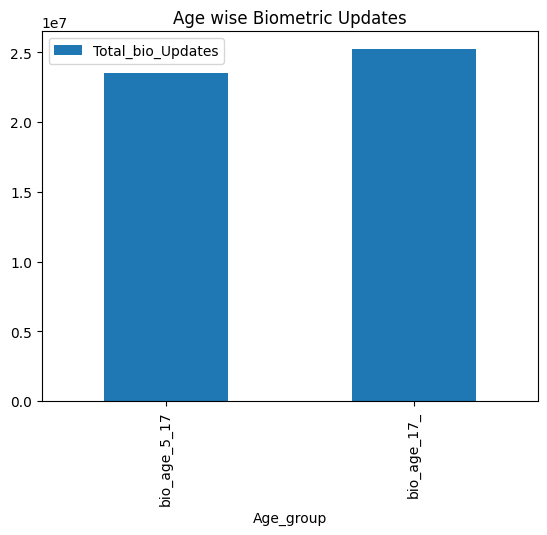

In [16]:
age_wise_bio_updation.plot(kind='bar', x='Age_group', y='Total_bio_Updates', title='Age wise Biometric Updates')
plt.show()

## State wise Biometric Updates

In [17]:
state_wise_bio_updation = (df.groupby('state')['total_bio_update'].sum().sort_values(ascending=False))

## Top 10 States with Biometric Updates

In [18]:
state_wise_bio_updation.head(10).reset_index()

,state,total_bio_update
0,Uttar Pradesh,6654783
1,Maharashtra,6026314
2,Madhya Pradesh,4619257
3,Bihar,3559921
4,Tamil Nadu,3028192
5,Rajasthan,2850587
6,Andhra Pradesh,2569305
7,Gujarat,2459996
8,Karnataka,1877706
9,West Bengal,1782719


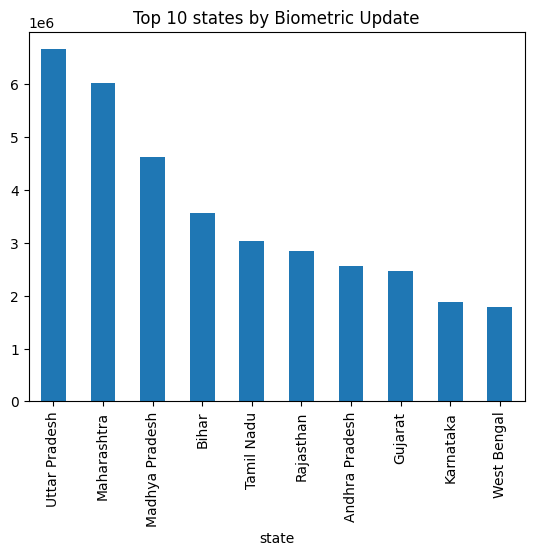

In [19]:
state_wise_bio_updation.head(10).plot(kind = 'bar', x='State', y='Total Update', title='Top 10 states by Biometric Update')
plt.show()

### Bottom 10 States

In [20]:
bottom_10_states = state_wise_bio_updation.tail(10).reset_index()
bottom_10_states

,state,total_bio_update
0,andhra pradesh,13
1,ODISHA,10
2,West bengal,6
3,Westbengal,6
4,odisha,6
5,West Bengal,4
6,Uttaranchal,1
7,WESTBENGAL,1
8,Chhatisgarh,1
9,west Bengal,1


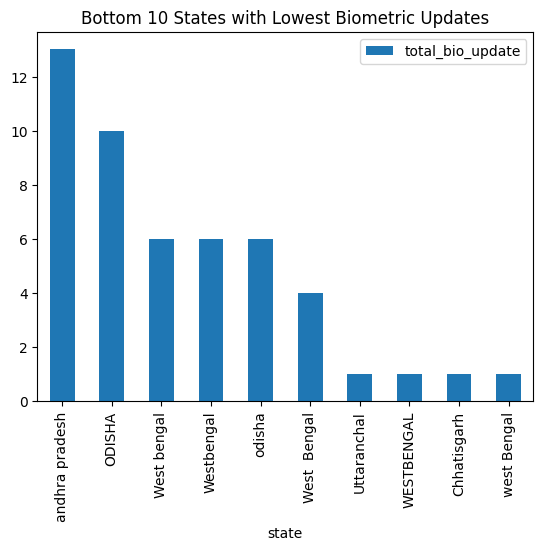

In [22]:
bottom_10_states.plot(kind = 'bar', x = 'state', y = 'total_bio_update', title = 'Bottom 10 States with Lowest Biometric Updates')
plt.show()

## District wise Analysis

In [23]:
district_wise_bio_updation = (df.groupby('district')['total_bio_update'].sum().sort_values(ascending=False))

### Top 10 District with highest Biometric updates

In [24]:
district_wise_bio_updation.head(10).reset_index()

,district,total_bio_update
0,Pune,402794
1,Nashik,372703
2,Thane,356627
3,Ahmedabad,313622
4,Jalgaon,279466
5,Aurangabad,274958
6,North West Delhi,256317
7,Mumbai,256279
8,Jaipur,254257
9,Kurnool,250147


### Bottom 10 District with Lowest Demographic updates

In [25]:
bottom_10_district = district_wise_bio_updation.tail(10).reset_index()
bottom_10_district

,district,total_bio_update
0,West Medinipur,1
1,KOLKATA,1
2,Hooghiy,1
3,NADIA,1
4,Domjur,1
5,Bally Jagachha,1
6,nadia,1
7,Nicobars,1
8,udhampur,1
9,Mahoba *,1


### Date wise analysis

In [26]:
date_wise_updates = df.groupby('date')['total_bio_update'].sum().sort_values(ascending=False)
date_wise_updates.head().reset_index()

,date,total_bio_update
0,2025-07-01,9792552
1,2025-04-01,8641679
2,2025-03-01,8322222
3,2025-06-01,7899289
4,2025-05-01,7879956


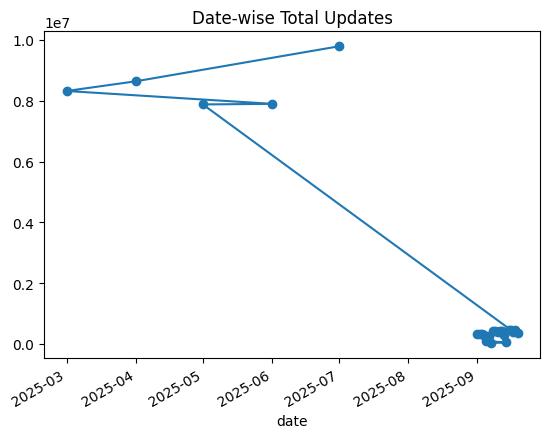

In [27]:
date_wise_updates.plot(kind='line', marker='o', title='Date-wise Total Updates')
plt.show()

#### On 2025-07-01 Highest Demographic Updates happened

## Key Insights
- Adults contribute the highest enrolments
- States like Uttar Pradesh and Maharashtra shows very high demographic updates
- And also District like Pune, Nashik, Thane show high Demographic updates
- District like Mahoba, Nicobars, udhampur need focus and attention
- Enrolments in age groups 0–5 and 5–17 are much lower compared to adults.